In [73]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import sys
sys.path.append(os.path.abspath("../../../../"))
import Constants as c
import Utilities as utils
print(os.getcwd())

/Users/housemex408/Documents/Git-Projects/PRAXIS/iROIEstimator/scripts/notebook/results/FINAL/H2


In [74]:
file_line = "../../06_21_2020/model_performance_results.csv"

df = pd.read_csv(file_line)

print(len(df))
# df.dropna(subset=[c.PRED_25], inplace=True)
# df.dropna(subset=[c.PRED_50], inplace=True)
# df = utils.remove_outlier(df, c.MAE)

# df.where(df[c.T_RECORDS] > 2, inplace = True)
na_percent = 1.00
# df.dropna()

print(len(df))

3456
3456


In [75]:
def hypothesisTest_Effort(model_records, model1, model2, task, pred, sample_size, na_filter):
    print("H2 test for {0}, {1}, and task = '{1}'".format(model1, model2, task))

    filter = True

    if task != "ALL":
        filter = model_records[c.TASK] == task
    
    na_filter = model_records[c.P_NA] <= na_percent
    
    s1_filter = (model_records[c.MODEL] == model1) & filter & na_filter
    s2_filter = (model_records[c.MODEL] == model2) & filter & na_filter

    s1 = model_records[s1_filter]

    # Make sure to comment this out if you want to include outliers
    s1 = utils.remove_outlier(s1, c.MAE)
    s1 = s1.sample(n=sample_size, random_state=0)

    s2 = model_records[s2_filter]

    # Make sure to comment this out if you want to include outliers
    s2 = utils.remove_outlier(s2, c.MAE)
    s2 = s2.sample(n=sample_size, random_state=0)

    num_records_s1 = len(s1)
    num_records_s2 = len(s2)
    s1_median = round(s1[pred].median(),2)
    s2_median = round(s2[pred].median(),2)
    s1_mean = round(s1[pred].mean(),2)
    s2_mean = round(s2[pred].mean(),2)
    s1_std = round(s1[pred].std(),2)
    s2_std = round(s2[pred].std(),2)


    s1_conf_int = stats.norm.interval(0.95, loc=s1_mean, scale=s1_std/np.sqrt(num_records_s1))
    s2_conf_int = stats.norm.interval(0.95, loc=s2_mean, scale=s2_std/np.sqrt(num_records_s2))

    # print("Number of records: {0}".format(num_records))
    print("{0} sample median: ".format(model1), s1_median)
    print("{0} sample median: ".format(model2), s2_median)
    print("{0} sample mean: ".format(model1), s1_mean)
    print("{0} sample mean: ".format(model2), s2_mean)
    print("{0} sample std: ".format(model1), s1_std)
    print("{0} sample std: ".format(model2), s2_std)
    print("{0} 95% CI: ".format(model1), s1_conf_int)
    print("{0} 95% CI: ".format(model2), s2_conf_int)
    
    alpha = 0.05

    is_gaussian = utils.gaussian_test(model_records[pred], alpha)

    utils.two_sample_rank_test(s1[pred], s2[pred], model1, model2, alpha)

    fig = plt.figure(figsize=(8,3))
    plt.tight_layout()
    
    sb.set(style="dark", palette="pastel")
    sb.distplot(s1[pred], kde=False, hist_kws={"histtype": "stepfilled", "alpha": 0.7, "linewidth": 3, "label":model1}, label=model1)
    sb.distplot(s2[pred], kde=False, hist_kws={"histtype": "stepfilled", "alpha": 0.7, "linewidth": 3, "label":model2}, label=model2)
    plt.title('PRED25 Distributions for Core & External Contributors (task = {0})'.format(task))
    plt.ylabel("Count")
    fig.legend(loc='lower right')
    plt.show()

In [76]:
task = "BUG"
# sample_size = 64
sample_size = 40

H2 test for Module_CC, Module_EC, and task = 'Module_EC'
Module_CC sample median:  0.9
Module_EC sample median:  0.94
Module_CC sample mean:  0.86
Module_EC sample mean:  0.94
Module_CC sample std:  0.13
Module_EC sample std:  0.05
Module_CC 95% CI:  (0.8197133229002035, 0.9002866770997965)
Module_EC 95% CI:  (0.924505124192386, 0.9554948758076139)
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
Two Sample Rank Test p-value:  0.0026175748374386784
Two Sample Rank Test: Module_CC median is not likely to be the same as Module_EC (reject H0)


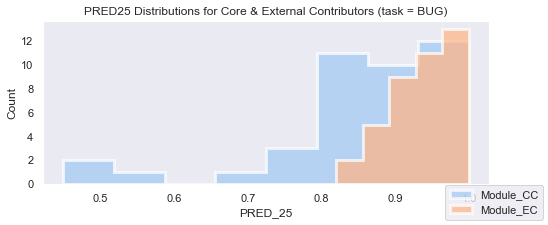

In [77]:
hypothesisTest_Effort(df.copy(), c.MODULE_CC, c.MODULE_EC, task, c.PRED_25, sample_size, na_percent)

H2 test for Line_CC, Line_EC, and task = 'Line_EC'
Line_CC sample median:  0.84
Line_EC sample median:  0.92
Line_CC sample mean:  0.82
Line_EC sample mean:  0.9
Line_CC sample std:  0.14
Line_EC sample std:  0.08
Line_CC 95% CI:  (0.7766143477386807, 0.8633856522613192)
Line_EC 95% CI:  (0.8752081987078175, 0.9247918012921825)
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
Two Sample Rank Test p-value:  0.001655251255451211
Two Sample Rank Test: Line_CC median is not likely to be the same as Line_EC (reject H0)


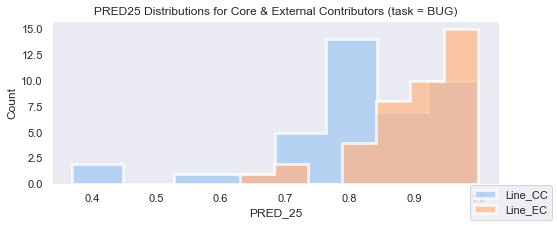

In [78]:
hypothesisTest_Effort(df.copy(), c.LINE_CC, c.LINE_EC, task, c.PRED_25, sample_size, na_percent)